## Import

In [2]:
from numpy import load
import numpy as np
import time 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Load Data

In [3]:
ag2l = load('/Users/krol/research/Summer2022/Inversion Benchmark Files/ag1000g_2L_gambiae_full.npz')
counts = ag2l['allele_counts']
pos = ag2l['positions']
mask = ag2l['mask']

In [4]:
#create a csv of values so I can manually check that these values are correct that Im getting out of the array
#for key, value in ag2l.items():
#    np.savetxt("test" + key + ".csv", value, fmt='%f')

## Looking at the Lovely Data

In [5]:
print("Allele_Counts ", counts, counts.shape)
print("Positions ", pos, pos.shape)
print("Mask ", mask, mask.shape)

Allele_Counts  [[0. 1. 1. ... 1. 1. 0.]
 [0. 2. 2. ... 0. 0. 1.]
 [0. 2. 2. ... 0. 0. 0.]
 ...
 [0. 2. 2. ... 0. 0. 0.]
 [0. 2. 2. ... 0. 0. 0.]
 [0. 2. 2. ... 1. 1. 0.]] (81, 596189)
Positions  [   44889    50387   157120 ... 49356239 49356248 49356406] (596189,)
Mask  [0. 0. 0. ... 0. 0. 0.] (596189,)


## Sliding Window

In [6]:
def slide_(allele_counts, windowsize, stepsize):
    #zz = np.zeros(windowsize[0], windowsize[1])
    alpos = []
    for x in range(0, allele_counts.shape[0], stepsize):
        for y in range(0, allele_counts.shape[1], stepsize):
            alcounts = allele_counts[x:x + windowsize[1], y:y+ windowsize[0]]
            if y % windowsize[0] == 0:
                alpos = (pos[y:y + windowsize[0]])
                almask = (mask[y:y + windowsize[0]])
            yield (alcounts, (alpos), (almask))

In [19]:
def rolling_(allele_counts, windowsize, stepsize):
    #get the input of the matrix and shapes
    h,w = allele_counts.shape
    #the window size
    ws = windowsize
    
    #hopefully fixing my issue with the bad dimensions towards the end
    d_h = int(np.floor(h-ws) / stepsize+1)
    d_w = int(np.floor(w-ws) / stepsize+1)
    
    lst = []
    s_r = 0
    for i in range(d_h):
        col = 0
        for j in range(d_w):
            sub_window = allele_counts[s_r:(s_r+ws), col:(col+ws)]
            lst.append(sub_window)
            col += stepsize
        s_r += stepsize
    return lst

## Getting the updated Allele_counts, Positions, and Masks

In [20]:
# Creatings a windows/kernel size
winsize = 10

In [21]:
aa = slide_(counts, np.array([winsize, winsize]), 1)
bb = slide_(counts, np.array([winsize, winsize]), 1)
cc = slide_(counts, np.array([winsize, winsize]), 1)

In [22]:
dd = rolling_(counts, 10, 1) o

In [23]:
for i in reversed(range(10)):
    print(dd[i])

[[1. 0. 1. 1. 1. 0. 1. 1. 0. 1.]
 [2. 0. 2. 2. 2. 0. 2. 1. 0. 2.]
 [2. 0. 2. 2. 2. 0. 2. 2. 0. 2.]
 [1. 0. 1. 1. 1. 0. 1. 1. 0. 1.]
 [2. 0. 2. 2. 2. 0. 2. 2. 0. 2.]
 [2. 0. 2. 2. 2. 0. 1. 2. 0. 2.]
 [2. 0. 1. 2. 2. 0. 1. 1. 0. 1.]
 [2. 0. 2. 2. 2. 0. 2. 2. 0. 2.]
 [1. 0. 1. 1. 1. 0. 1. 1. 0. 1.]
 [2. 0. 2. 2. 2. 0. 2. 2. 0. 2.]]
[[1. 1. 0. 1. 1. 1. 0. 1. 1. 0.]
 [2. 2. 0. 2. 2. 2. 0. 2. 1. 0.]
 [2. 2. 0. 2. 2. 2. 0. 2. 2. 0.]
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 0.]
 [2. 2. 0. 2. 2. 2. 0. 2. 2. 0.]
 [2. 2. 0. 2. 2. 2. 0. 1. 2. 0.]
 [2. 2. 0. 1. 2. 2. 0. 1. 1. 0.]
 [2. 2. 0. 2. 2. 2. 0. 2. 2. 0.]
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 0.]
 [2. 2. 0. 2. 2. 2. 0. 2. 2. 0.]]
[[1. 1. 1. 0. 1. 1. 1. 0. 1. 1.]
 [2. 2. 2. 0. 2. 2. 2. 0. 2. 1.]
 [2. 2. 2. 0. 2. 2. 2. 0. 2. 2.]
 [1. 1. 1. 0. 1. 1. 1. 0. 1. 1.]
 [2. 2. 2. 0. 2. 2. 2. 0. 2. 2.]
 [2. 2. 2. 0. 2. 2. 2. 0. 1. 2.]
 [2. 2. 2. 0. 1. 2. 2. 0. 1. 1.]
 [2. 2. 2. 0. 2. 2. 2. 0. 2. 2.]
 [1. 1. 1. 0. 1. 1. 1. 0. 1. 1.]
 [2. 2. 2. 0. 2. 2. 2. 0. 2. 2.]]
[[1. 1.

In [12]:
alc_ = []
alc_n = []
alc_p = []
alp_ = []
alm_ = []

### Getting the masks
We are grabbing the masks based on the kernel size and where the slide_ method left on getting through the allele_count matrix's

In [9]:
%%time
for _, _, almask in bb:
    #print("Print Orginal: ", almask)
    #print("Print modified: ", np.tile(almask, (1,3)))
    alm_.append(np.tile(almask, (1,winsize[0])))

#o = np.unique(temp, axis=0)
#for i in o:
#    alp_.append(np.tile([i], (3,1)))

CPU times: user 2min 2s, sys: 5.07 s, total: 2min 7s
Wall time: 2min 9s


### Getting the Positions 
We are creating matrix's based on the kernel size of the positions that we are grabbing the windows from the allele_count matrix

%%time
counter = 0
for _, alposition, _ in aa:
    counter = counter + 1
    if counter % 3 == 0:
        alp_.append(np.tile(alposition, (winsize[0], 1)))

### Getting the Counts
Here we are simply appending the array which is our window of elements that we have gathered into a list 

In [10]:
%%time
for c,_,_ in cc:
    alc_.append(c)

CPU times: user 31.2 s, sys: 641 ms, total: 31.9 s
Wall time: 32 s


### Cells used for Debugging

In [11]:
print(len(alp_))
print(len(alc_))
print(len(alm_))

0
48291309
48291309


In [12]:
print(alc_[0:100])
print(counts[0:100])

[array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [1., 2., 1., 1., 2., 2., 2., 2., 2., 2.],
       [0., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 2., 2., 2., 2., 2., 2., 2., 2., 2.]]), array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 0.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 0.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 0.],
       [2., 1., 1., 2., 2., 2., 2., 2., 2., 0.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 0.]]), array([[1., 1.,

In [13]:
print(alm_[0:100])
print(mask[0:100])

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0

In [14]:
print(alp_[0:100])
print(pos[0:100])

[]
[ 44889  50387 157120 165058 165344 165717 166431 186944 203883 204305
 208180 209004 222644 222664 227164 248971 271212 357518 358268 370986
 417948 422486 422589 426828 435036 459499 461325 488303 494589 494761
 495446 495965 526534 526869 529911 558690 569206 593809 618025 626760
 626767 636078 640637 642403 642675 642984 644950 646456 647640 650016
 674065 676192 676398 677282 678220 678407 693053 697526 698162 699324
 705881 712327 712560 712626 712684 714430 714517 717403 718230 718289
 718549 719364 741816 741916 745233 745743 747879 748191 748398 748934
 757496 762508 770611 770830 771889 772038 772904 773182 788067 789383
 789931 793893 794105 796286 810384 811838 816560 832145 854472 856745]


## Visualizing the Windows
- This is plotting before PCA. 

[[1. 1. 1. 0. 0. 1. 0. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [0. 1. 1. 0. 0. 0. 2. 0. 0. 2.]
 [0. 1. 1. 0. 0. 0. 2. 0. 0. 2.]
 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [0. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 2.]
 [0. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
 [0. 1. 1. 2. 2. 0. 0. 0. 0. 2.]
 [0. 1. 1. 0. 0. 1. 1. 1. 1. 1.]]


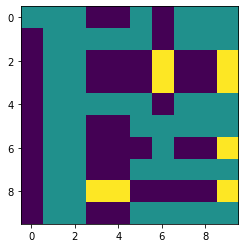

In [15]:
#plotting a numpy array to see how they look like within imshow
print(alc_[200])
plt.imshow(alc_[200])

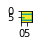

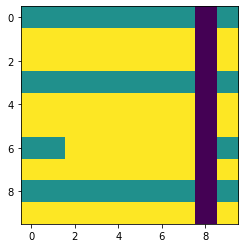

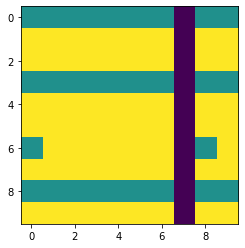

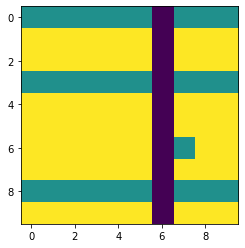

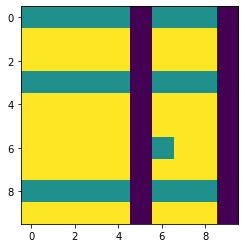

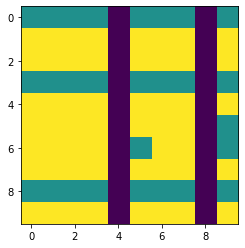

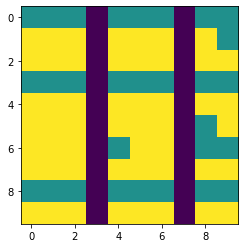

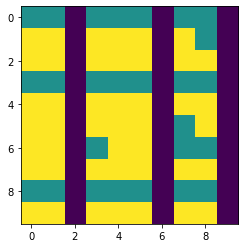

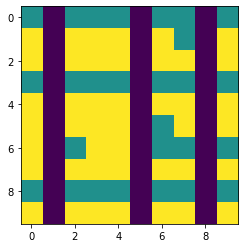

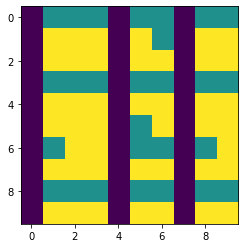

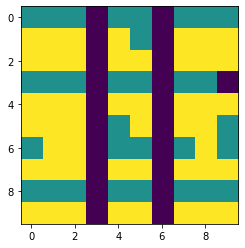

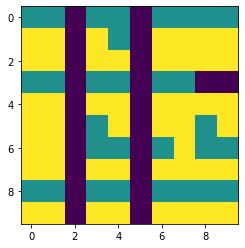

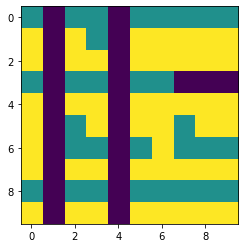

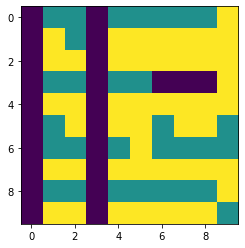

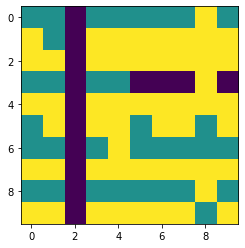

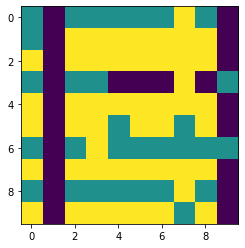

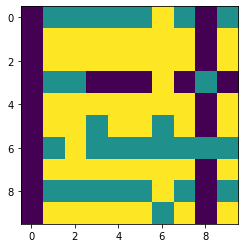

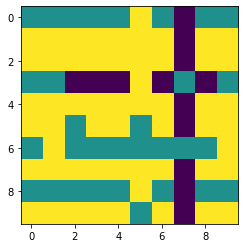

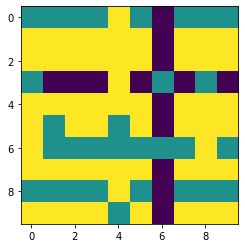

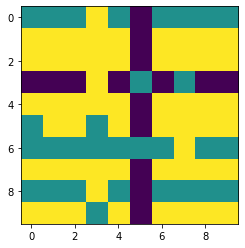

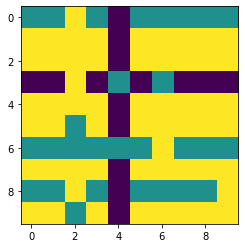

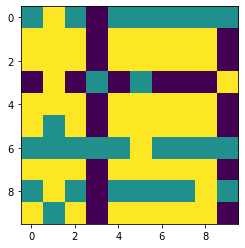

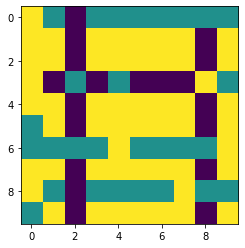

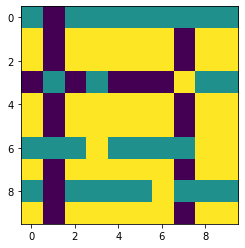

In [16]:
f = plt.figure()
for i in range(1,25):
    f.add_subplot(1,25, i+1)
    plt.imshow(alc_[i])
    plt.show()

## TODO:
- 1) Seperate some of the matrices containing negative values into a sperate array
- 2) Perform PCA on these plots to see what we can do
   - We try to get it to plot with PCA .. experiemnent with the number of n_components

### 1) Very Naive Way of Getting the matrix's with negative Values

In [17]:
for i in alc_:
    if -1 in i:
        alc_n.append(i)
    else:
        alc_p.append(i) 

## Plotting Positive Samples

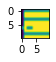

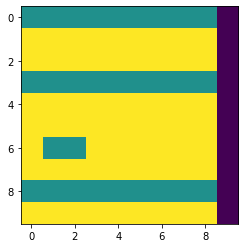

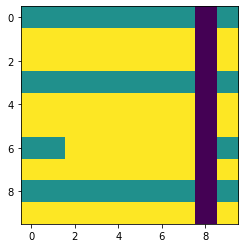

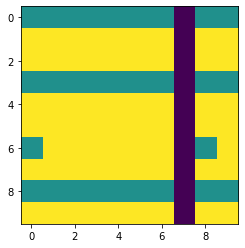

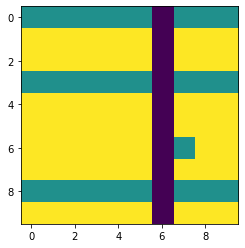

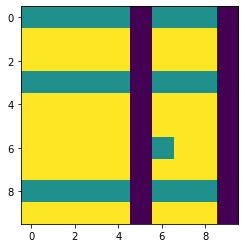

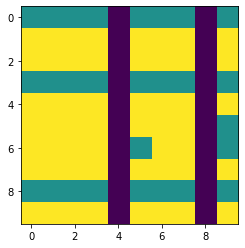

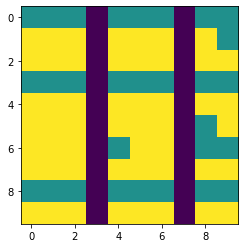

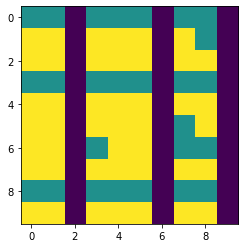

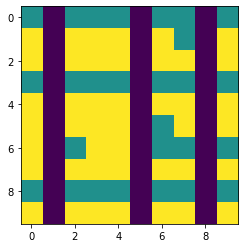

In [18]:
f = plt.figure()
for i in range(0, 10):
    f.add_subplot(1,10, i+1)
    plt.imshow(alc_p[i])
    plt.show()

## Plotting Negative Samples

[[ 1.  2.  2.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  2.  2.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  2.  2.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  2.  1.  1.  1.  1.  2.  2.  2.  2.]
 [ 0.  2.  0.  0.  0.  0.  2.  2.  2. -1.]
 [ 0.  2.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  2.  2.  1.  1.  1.  1.  1.  1.  1.]]


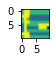

[[ 2.  2.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  2.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  1.  1.  1.  1.  2.  2.  2.  2.  2.]
 [ 2.  0.  0.  0.  0.  2.  2.  2. -1. -1.]
 [ 2.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  2.  1.  1.  1.  1.  1.  1.  1.  1.]]


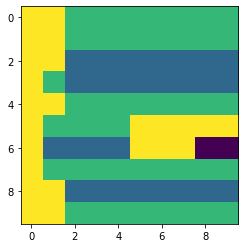

[[ 2.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  2.  2.  2.  2.  2.  2.]
 [ 0.  0.  0.  0.  2.  2.  2. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


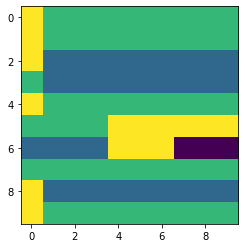

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  2.  2.  2.  2.  2.  2.  1.]
 [ 0.  0.  0.  2.  2.  2. -1. -1. -1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]]


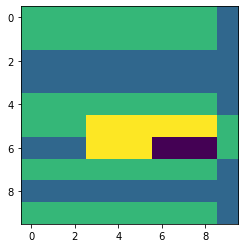

[[ 1.  1.  1.  1.  1.  1.  1.  1.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  0.  0.]
 [ 1.  1.  2.  2.  2.  2.  2.  2.  1.  2.]
 [ 0.  0.  2.  2.  2. -1. -1. -1.  1.  2.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  0.  0.]]


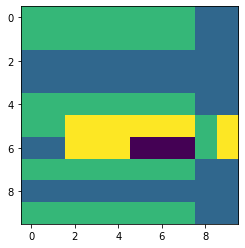

[[ 1.  1.  1.  1.  1.  1.  1.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.  0.  0.]
 [ 1.  2.  2.  2.  2.  2.  2.  1.  2.  1.]
 [ 0.  2.  2.  2. -1. -1. -1.  1.  2.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.  0.  0.]]


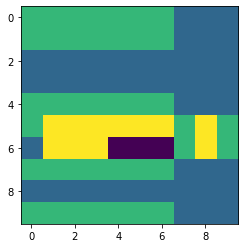

[[ 1.  1.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 2.  2.  2.  2.  2.  2.  1.  2.  1.  2.]
 [ 2.  2.  2. -1. -1. -1.  1.  2.  1.  2.]
 [ 1.  1.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  0.  0.  0.  0.]]


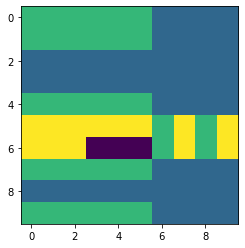

[[ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 2.  2.  2.  2.  2.  1.  2.  1.  2.  1.]
 [ 2.  2. -1. -1. -1.  1.  2.  1.  2.  1.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]]


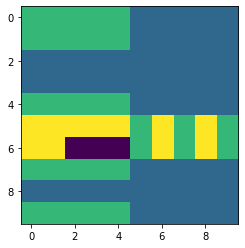

[[ 1.  1.  1.  1.  0.  0.  0.  0.  0.  1.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  1.]
 [ 2.  2.  2.  2.  1.  2.  1.  2.  1.  1.]
 [ 2. -1. -1. -1.  1.  2.  1.  2.  1.  0.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  1.]]


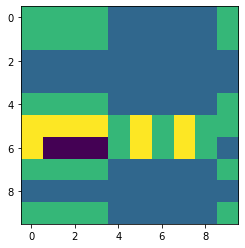

[[ 1.  1.  1.  0.  0.  0.  0.  0.  1.  1.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  1.  1.]
 [ 2.  2.  2.  1.  2.  1.  2.  1.  1.  1.]
 [-1. -1. -1.  1.  2.  1.  2.  1.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  1.  1.]]


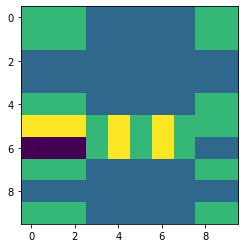

In [19]:
f = plt.figure()
for i in range(0, 10):
    f.add_subplot(1,10, i+1)
    print(alc_n[i])
    plt.imshow(alc_n[i])
    plt.show()

## More debugging

## Plotting with PCA

pca = PCA(n_components = 0.95, whiten=True)
proj = pca.fit_transform(alc_)

for label in alm_:
    mask = alm_ == label
    print(alc_[mask])

## Saving the to a compressed Numpy file

please don't eat my ram =(

np.savez_compressed('test', allele_counts=alc_, position=alp_, mask=alm_)